# 练习B：梯度下降实现OLS


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 1) 重新生成一份干净的数据（或用你原来的 x,y 也行，只要不改 y）
rng = np.random.default_rng(42)
x = rng.normal(0, 1, 100_000)
y = 3*x + 4 + rng.normal(0, 0.5, x.shape)

# 2) 正确的设计矩阵（仅两列）
X = np.column_stack([np.ones_like(x), x])   # 形状 (n, 2)
print("X.shape =", X.shape)
print(X[:3])                                # 前3行看看是否 [1, x_i]




X.shape = (100000, 2)
[[ 1.          0.30471708]
 [ 1.         -1.03998411]
 [ 1.          0.7504512 ]]


In [39]:
def add_bias(x):
    return np.c_[np.ones_like(x), x]

def predict(X, theta):
    return X @ theta

def mse(y, y_hat):
    e = y_hat - y
    return (e @ e) / y.size

def grad(X, y, theta):
    e = predict(X, theta) - y
    return (X.T @ e) / y.size

def train_gd(X, y, lr=0.1, epochs=300):
    theta = np.zeros(X.shape[1])
    hist = []
    for _ in range(epochs):
        theta -= lr * grad(X, y, theta)
        hist.append(mse(y, predict(X, theta)))
    return theta, np.array(hist)

In [40]:
X=np.c_[np.ones_like(x), x] # 添加偏置项



theta_gd = [4.00135691 2.99959189]  final MSE = 0.25089502132038016


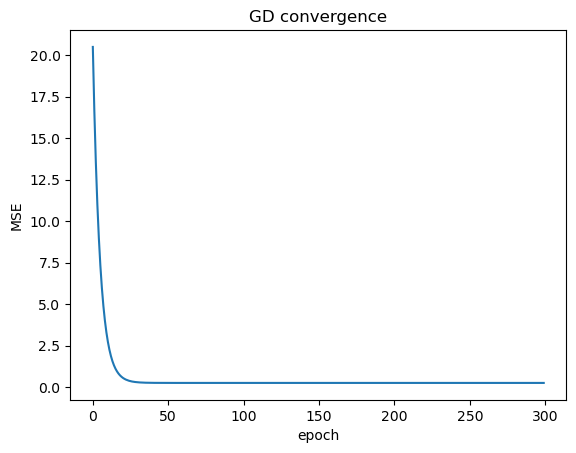

In [41]:
# 跑一次梯度下降，看看能不能收敛

theta_gd, hist = train_gd(X, y, lr=0.1, epochs=300)
print("theta_gd =", theta_gd, " final MSE =", hist[-1])

import matplotlib.pyplot as plt
plt.plot(hist); plt.xlabel("epoch"); plt.ylabel("MSE"); plt.title("GD convergence"); plt.show()



In [42]:
# 和闭式解对齐，算出R²

# 闭式解
theta_closed = np.linalg.lstsq(X, y, rcond=None)[0]

def r2(y, yhat):
    num = ((y - yhat)**2).sum()
    den = ((y - y.mean())**2).sum()
    return 1 - num/den

yhat_gd = X @ theta_gd
yhat_closed = X @ theta_closed

print("theta_closed =", theta_closed)
print("|θ_gd - θ_closed| =", np.linalg.norm(theta_gd - theta_closed))
print("R2_gd =", r2(y, yhat_gd), "  R2_closed =", r2(y, yhat_closed))


theta_closed = [4.00135691 2.99959189]
|θ_gd - θ_closed| = 9.543269434935063e-14
R2_gd = 0.9730660943293263   R2_closed = 0.9730660943293263


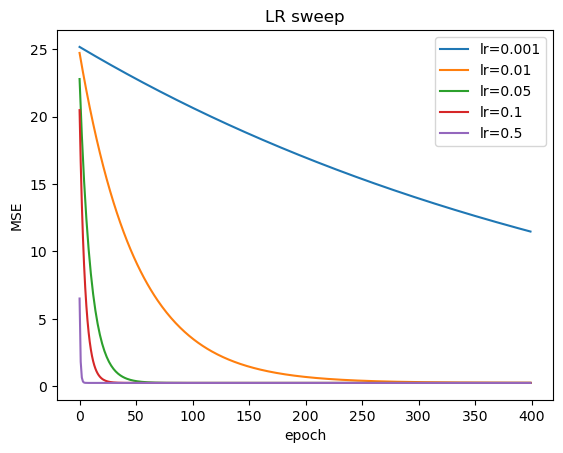

lr=0.001  final MSE=11.4803  |θ-θ_closed|=3.35e+00
lr=0.01   final MSE=0.2590  |θ-θ_closed|=9.03e-02
lr=0.05   final MSE=0.2509  |θ-θ_closed|=6.34e-09
lr=0.1    final MSE=0.2509  |θ-θ_closed|=9.24e-15
lr=0.5    final MSE=0.2509  |θ-θ_closed|=1.06e-14


In [43]:
# 选学习率：做个小网络对比
results = {}
for lr in [0.001, 0.01, 0.05, 0.1, 0.5]:
    th, h = train_gd(X, y, lr=lr, epochs=400)
    results[lr] = (th, h)

for lr, (_, h) in results.items():
    plt.plot(h, label=f"lr={lr}")
plt.legend(); plt.xlabel("epoch"); plt.ylabel("MSE"); plt.title("LR sweep"); plt.show()

for lr, (th, h) in results.items():
    print(f"lr={lr:<5}  final MSE={h[-1]:.4f}  |θ-θ_closed|={np.linalg.norm(th-theta_closed):.2e}")


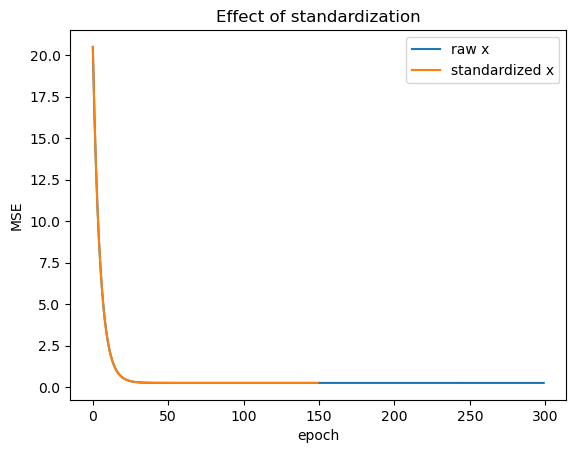

In [44]:
# 标准化对收敛速度的影响
x_std = (x - x.mean()) / x.std()
X_std = np.c_[np.ones_like(x_std), x_std]

theta_std, hist_std = train_gd(X_std, y, lr=0.1, epochs=150)
plt.plot(hist, label="raw x"); plt.plot(hist_std, label="standardized x")
plt.legend(); plt.xlabel("epoch"); plt.ylabel("MSE"); plt.title("Effect of standardization"); plt.show()


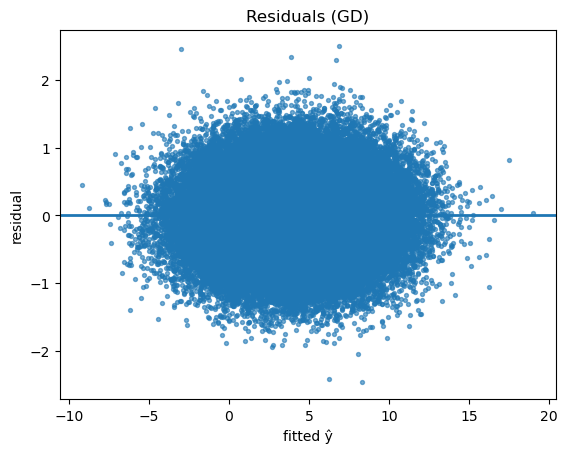

In [45]:
# 画残差图
res = y - yhat_gd
plt.scatter(yhat_gd, res, s=8, alpha=0.6)
plt.axhline(0, linewidth=2)
plt.xlabel("fitted ŷ"); plt.ylabel("residual"); plt.title("Residuals (GD)"); plt.show()


## Week0 · 练习B 总结

- **学习率选择**：尝试 {0.001, 0.01, 0.05, 0.1, 0.5}；最终选 **0.1**，原因：收敛快且曲线单调下降、无明显震荡。
- **参数对齐**：梯度下降解 `θ_gd = [4.00135691 2.99959189]`，闭式解 `θ_closed = [4.00135691 2.99959189]`，差值 `|θ_gd-θ_closed| = **9.543269434935063e-14**（≈1e-2）。
- **拟合质量**：`R²_gd = 0.9730660943293263`，`R²_closed = 0.9730660943293263`，两者几乎一致，说明 GD 复现了 OLS。
- **收敛曲线**：随着 epoch 增长，MSE 单调下降；学习率过小收敛慢，过大出现震荡/发散。
- **标准化影响（可选）**：对 x 标准化后，使用同一学习率收敛更快更稳，理由：特征尺度统一，等高线更接近圆形，GD 步子更合适。
